In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set1")

# Dataset 


## Información general
RAVDESS | Ryerson Audio-Visual Database of Emotional Speech and Song 
--- | --- 
Idioma | North American English
Muestras | 1440
Emociones | anger calm disgust fear happiness sadness surprise neutral
Nº de actores | 24 (12H 12M)
Naturaleza | Simulada
URLs | [Documentación](https://smartlaboratory.org/ravdess/) - [Paper construcción RAVDESS](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196391)

Emotional intensity (01 = normal, 02 = strong)

**Archivos**

carcterística | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps


## Selección de muestras
Emociones de estudio
- anger 
- disgust 
- fear 
- happiness 
- sadness

En **este notebook** se selecionarán las muestras con **intensidad emocional** alta de los **sujetos masculinos**.

### Duración de los audios
Se carga el dataset, desde su forma serialiazada para el estudio de la duración de los audios:

In [2]:
dataset = "ravdess-male-0.025-01234"
dataset_path = "/home/mike/PycharmProjects/tfm-project/data/" + dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))

Loading data from ravdess-male-0.025-01234 data set...


**Número de instancias**

In [3]:
number_instances = len(ds.targets)
print("Number of instances: " + str(number_instances))

Number of instances: 240


**Distribución de duración** de los audios

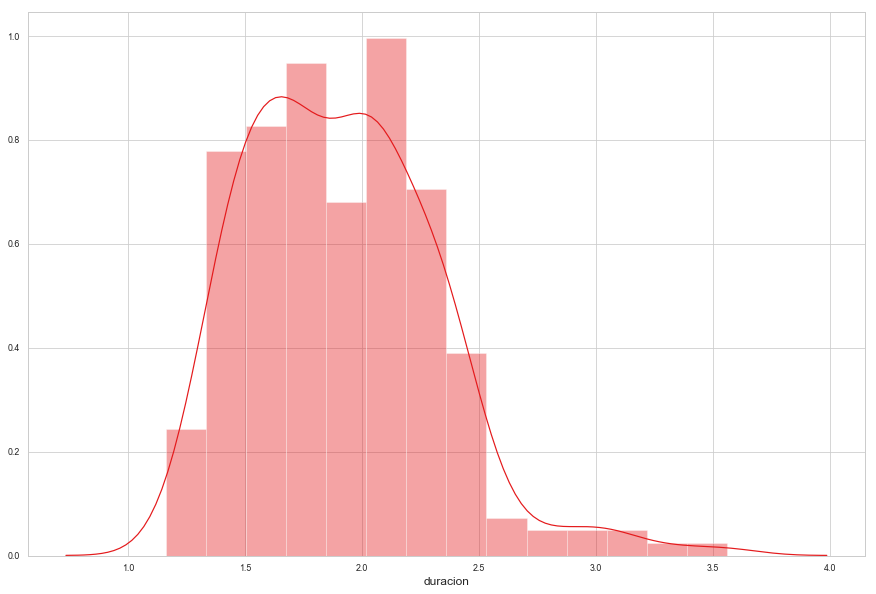

In [4]:
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_instances = len(ds.targets)
duracion = []
for i in range(0, number_instances):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [5]:
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: ds.dictionary[i])
df_emotions.value_counts()

sadness      48
happiness    48
fear         48
disgust      48
anger        48
Name: emotion, dtype: int64

**Distribución de duración según la emoción**

In [6]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

### Selección de la longitud de ventana de muestreo

In [42]:
dataset_no_frame_size="ravdess-01234"
df_compare_frame_size = pd.read_csv('data/compare_frame_size_csv/' + dataset_no_frame_size +
                                    '.csv')

plt.rcParams['figure.figsize'] = (15.0, 180.0)
i=1
for column in df_compare_frame_size.drop(["frame_size", "emotion"], axis=1):
    plt.subplot(18,2,i)
    sns.lineplot(x="frame_size",
                 y=column,
                 hue="emotion",
                 data=df_compare_frame_size)
    i+=1
plt.show()

plt.rcParams['figure.figsize'] = (15.0, 10.0)

# Características

### Cargando datos
Se crea un dataframe con índice múltiple para las características de audio.

In [8]:
df_features = pd.read_csv(dataset_path + "features-" + dataset + '.csv')
df_features = df_features.set_index(["audio_number", "frame"])

removed_features = np.arange(21, 34, 1)
df_features.drop(df_features.columns[removed_features], axis=1, inplace=True)

df_features.head()

zcr    energy  energy_entropy  spectral_centroid  \
audio_number frame                                                          
0            0      0.197015  0.000006        0.921212           0.365080   
             1      0.131343  0.000004        0.771944           0.290848   
             2      0.077612  0.000021        0.580280           0.194857   
             3      0.014925  0.000025        0.707206           0.173264   
             4      0.026866  0.000005        0.741380           0.193095   

                    spectral_spread  spectral_entropy  spectral_flux  \
audio_number frame                                                     
0            0             0.593849          0.371983       0.000000   
             1             0.577573          0.203948       0.023486   
             2             0.556530          0.043229       0.045400   
             3             0.543147          0.025206       0.028645   
             4             0.538442          0.054099       0.047760   

                    spectral_rolloff    mfcc_1    mfcc_2  ...    mfcc_6  \
audio_number frame                                        ...             
0            0              0.221053  0.306321  0.332472  ...  0.586698   
             1              0.089474  0.265675  0.377284  ...  0.653957   
             2              0.010526  0.276318  0.472485  ...  0.874215   
             3              0.005263  0.277732  0.556177  ...  0.680004   
             4              0.015789  0.297200  0.604275  ...  0.604998   

                      mfcc_7    mfcc_8    mfcc_9   mfcc_10   mfcc_11  \
audio_number frame                                                     
0            0      0.678253  0.511666  0.676534  0.552433  0.496428   
             1      0.582273  0.531425  0.676095  0.542170  0.484275   
             2      0.846531  0.718734  0.708502  0.485313  0.327495   
             3      0.788318  0.675333  0.605033  0.489614  0.557729   
             4      0.544313  0.635200  0.590070  0.503216  0.487587   

                     mfcc_12   mfcc_13  harmonic_ratio  pitch  
audio_number frame                                             
0            0      0.570042  0.526964        0.000047    0.0  
             1      0.501599  0.425134        0.000018    0.0  
             2      0.450306  0.415221        0.000043    0.0  
             3      0.611062  0.439157        0.000000    0.0  
             4      0.498620  0.522969        0.000000    0.0  

[5 rows x 23 columns]

Se crea un dataframe con la relación entre emoción, sujeto y número de audio.

In [9]:
df_emotions = pd.read_csv(dataset_path +"emotions-" +dataset + '.csv')
df_emotions = df_emotions.set_index(["audio_number"])
df_emotions.head()

emotion  subject
audio_number                  
0                fear        5
1               anger        8
2                fear        6
3                fear        9
4             disgust        3

La **información mutua** entre dos variables aleatorias es un valor no negativo, que mide la dependencia entre las variables. Es igual a cero si y solo si dos variables aleatorias son independientes, y los valores más altos significan una mayor dependencia.

In [10]:
from sklearn.feature_selection import mutual_info_classif

x = df_features.groupby("audio_number").mean()
y = df_emotions["emotion"]
mi = mutual_info_classif(x, y, discrete_features="auto")
df_mi = pd.DataFrame(data=mi,columns=["values"])
df_mi["names"]= x.columns.tolist()
df_mi.sort_values(by="values",ascending=False)

values              names
9   0.508378             mfcc_2
5   0.349044   spectral_entropy
17  0.249251            mfcc_10
15  0.241732             mfcc_8
16  0.212665             mfcc_9
10  0.206778             mfcc_3
2   0.185495     energy_entropy
3   0.180159  spectral_centroid
7   0.166830   spectral_rolloff
13  0.160909             mfcc_6
18  0.157014            mfcc_11
20  0.129330            mfcc_13
22  0.117765              pitch
8   0.105374             mfcc_1
11  0.096697             mfcc_4
12  0.091277             mfcc_5
19  0.088024            mfcc_12
0   0.083705                zcr
1   0.075504             energy
14  0.075394             mfcc_7
4   0.063423    spectral_spread
6   0.055111      spectral_flux
21  0.035772     harmonic_ratio

Función para la **representación de los boxplot de cada caraterística**

In [11]:
def display_boxplot(feature, df_features, df_emotions):
    df_features_mean = pd.DataFrame(columns=df_features.columns)
    for i in range(0, df_emotions.shape[0]):
        df_features_mean = df_features_mean.append(df_features.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions["emotion"], df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)


In [12]:
print("Sujetos disponibles: [0," + str(len(np.unique(df_emotions["subject"])) - 1) + "]")

Sujetos disponibles: [0,11]


Dado subjeto y característica, la función muestra la evolución de la característica en un audio (que representa cada emoción)

In [13]:
#Busco un audio que represente cada emoción del sujeto seleccionado

def one_subject_one_feature(subject, feature, df_features, df_emotions):
    df_one_subject = pd.DataFrame()

    for emotion in np.unique(df_emotions.emotion):  #for para recorrer las emociones
        for audio in df_emotions[df_emotions.subject==subject].index:  
            if df_emotions.emotion[audio] == emotion:  # si el audio corresponde a la emocion deseada, lo guardamos y cambiamos de emocion
                row = df_features.loc[audio, :][feature]
                df_one_subject = pd.concat([df_one_subject, row],
                                           axis=1,
                                           ignore_index=True)
                break

    df_one_subject.columns = ds.dictionary.values()
    for emotion in df_one_subject.columns:
        plt.plot(df_one_subject[emotion])
        plt.title('Subject number '+str(subject))
        plt.xlabel("frame")
        plt.ylabel(feature)
    plt.legend()     
    plt.show()   


## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


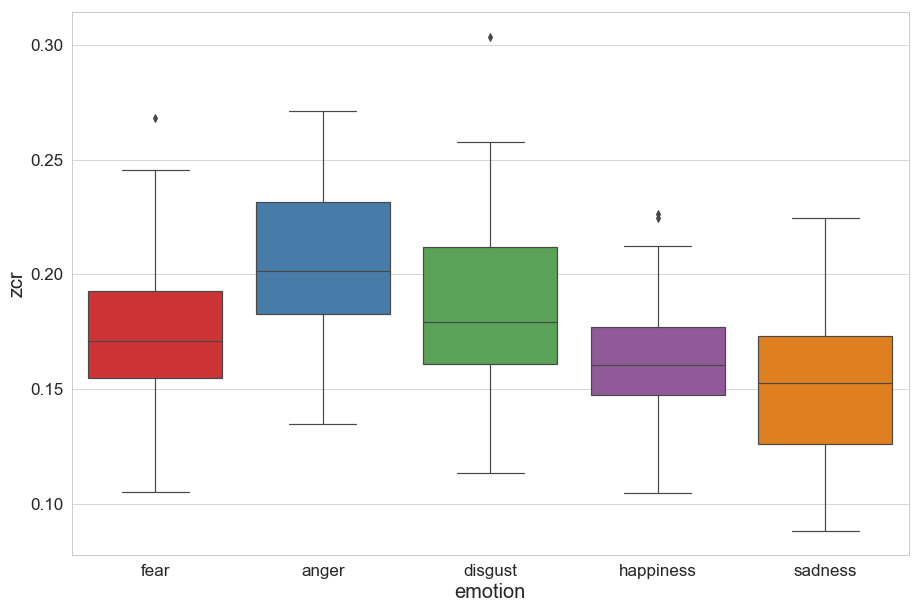

In [14]:
display_boxplot("zcr", df_features, df_emotions)

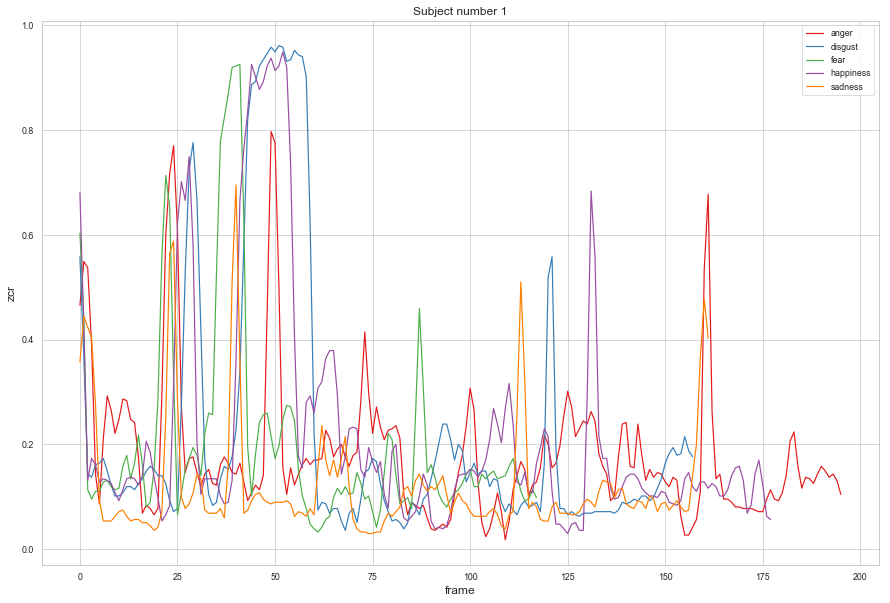

In [15]:
one_subject_one_feature(1, "zcr", df_features, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

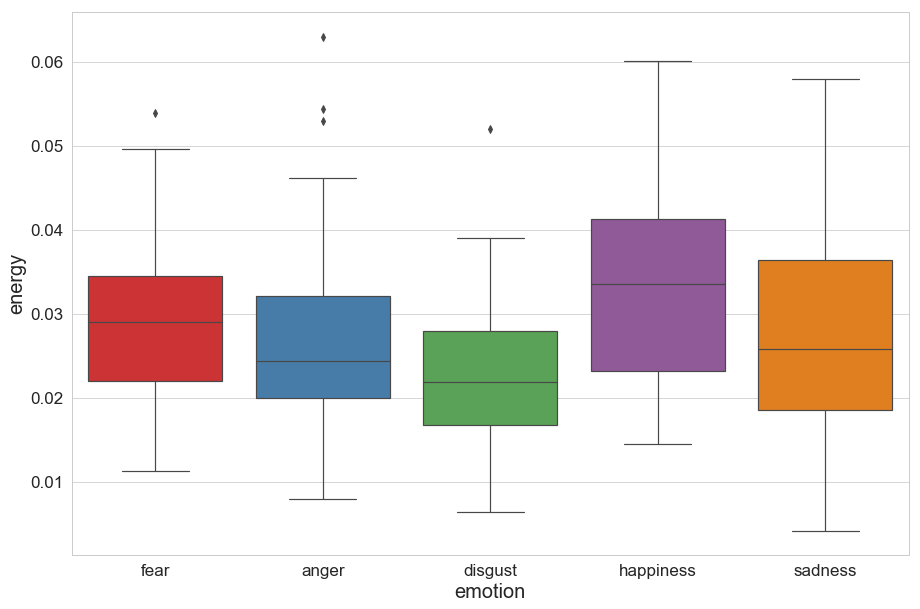

In [16]:
display_boxplot("energy", df_features, df_emotions)

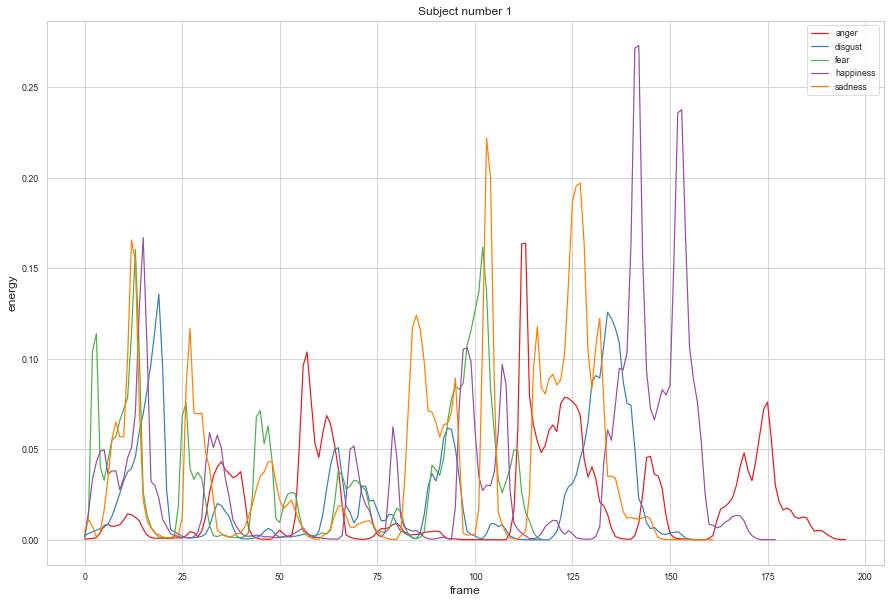

In [17]:
one_subject_one_feature(1, "energy", df_features, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

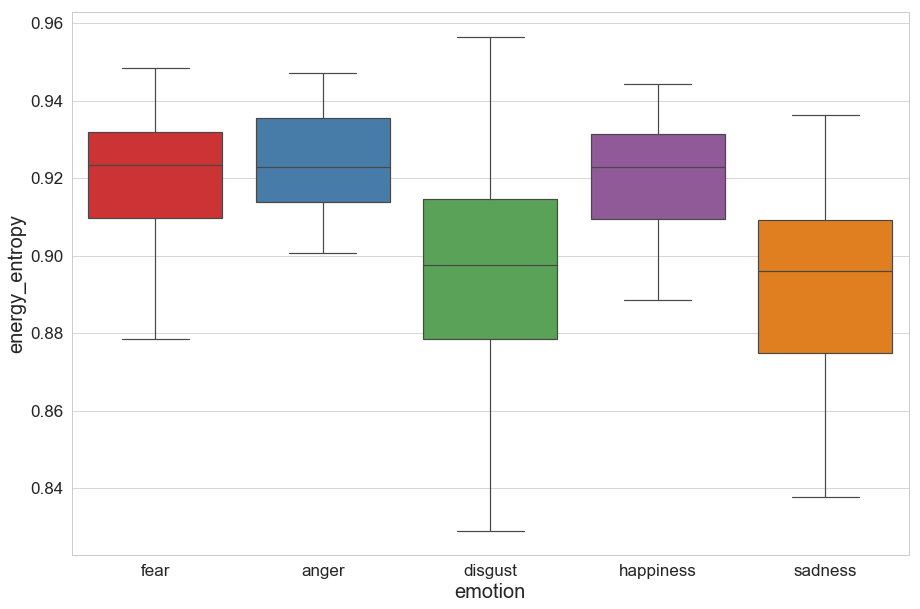

In [18]:
display_boxplot("energy_entropy", df_features, df_emotions)

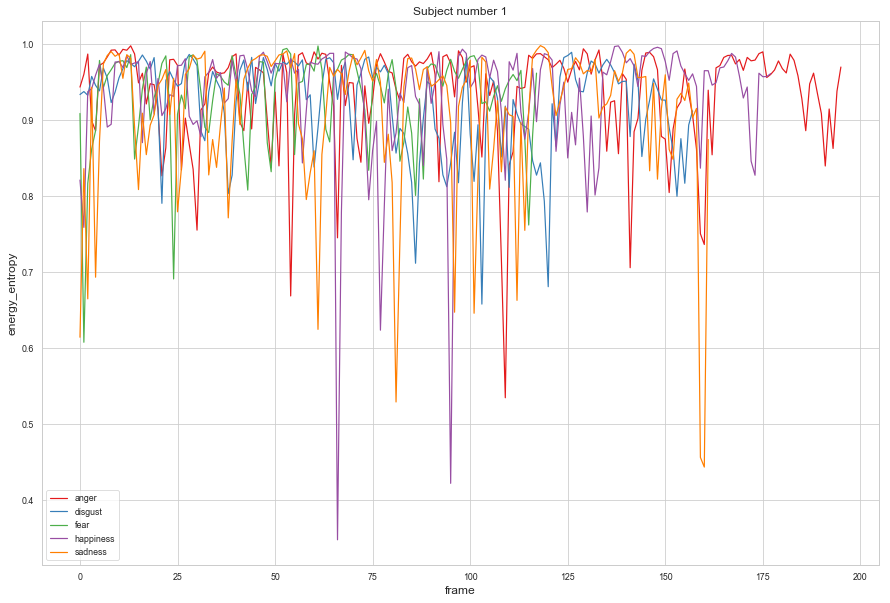

In [19]:
one_subject_one_feature(1, "energy_entropy", df_features, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

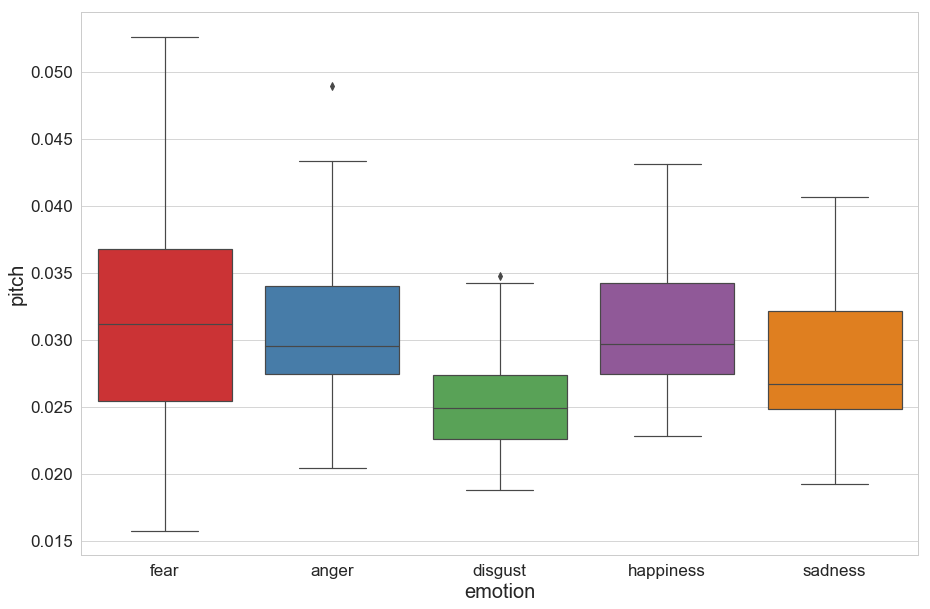

In [20]:
display_boxplot("pitch", df_features, df_emotions)

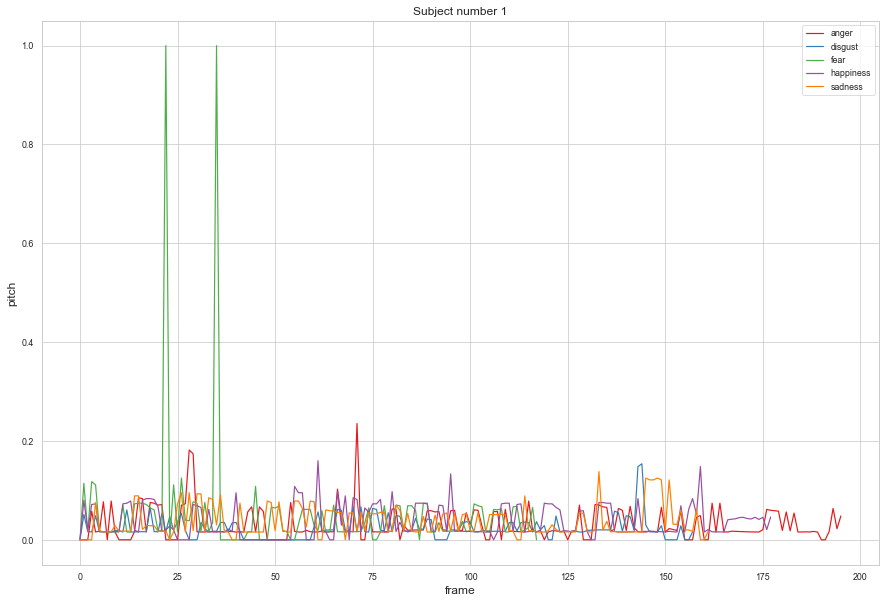

In [21]:
one_subject_one_feature(1, "pitch", df_features, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energía en la porción armónica del frame respecto a la total.

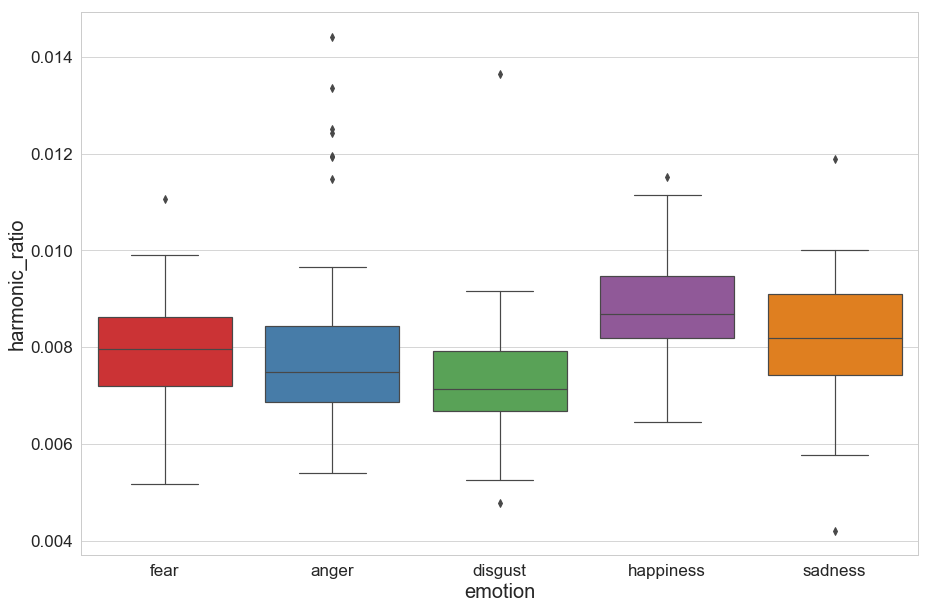

In [22]:
display_boxplot("harmonic_ratio", df_features, df_emotions)

In [23]:
one_subject_one_feature(1, "harmonic_ratio", df_features, df_emotions)

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

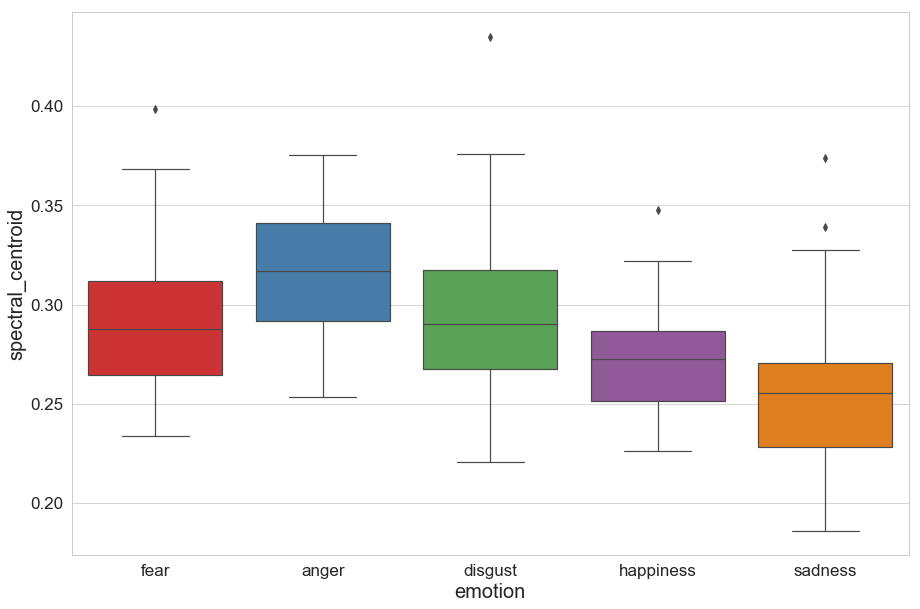

In [24]:
display_boxplot("spectral_centroid", df_features, df_emotions)

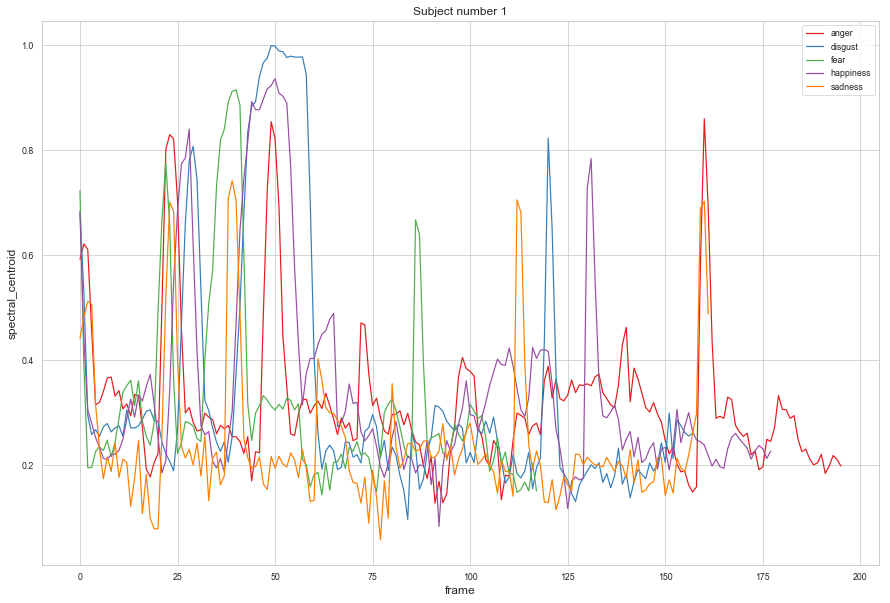

In [25]:
one_subject_one_feature(1, "spectral_centroid", df_features, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

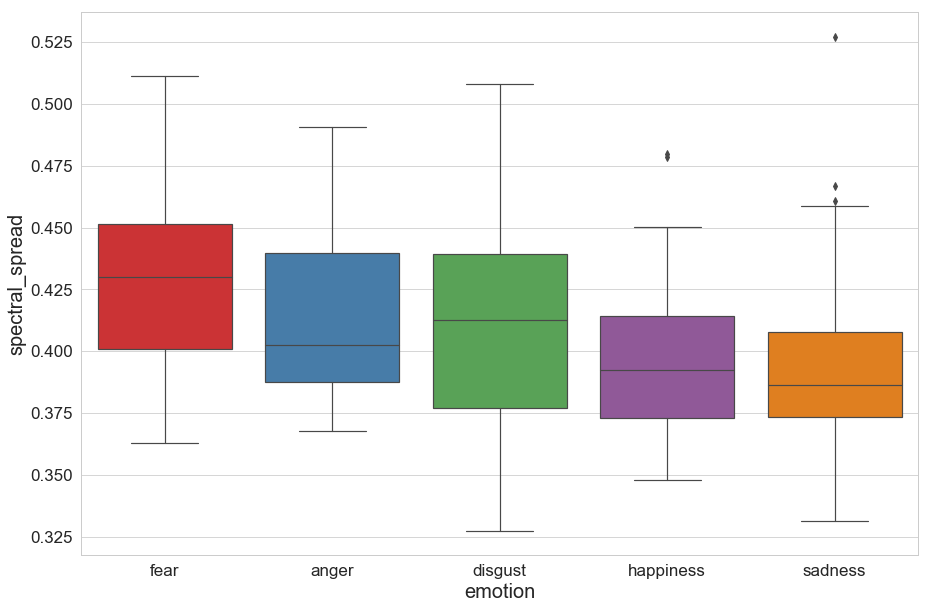

In [26]:
display_boxplot("spectral_spread", df_features, df_emotions)

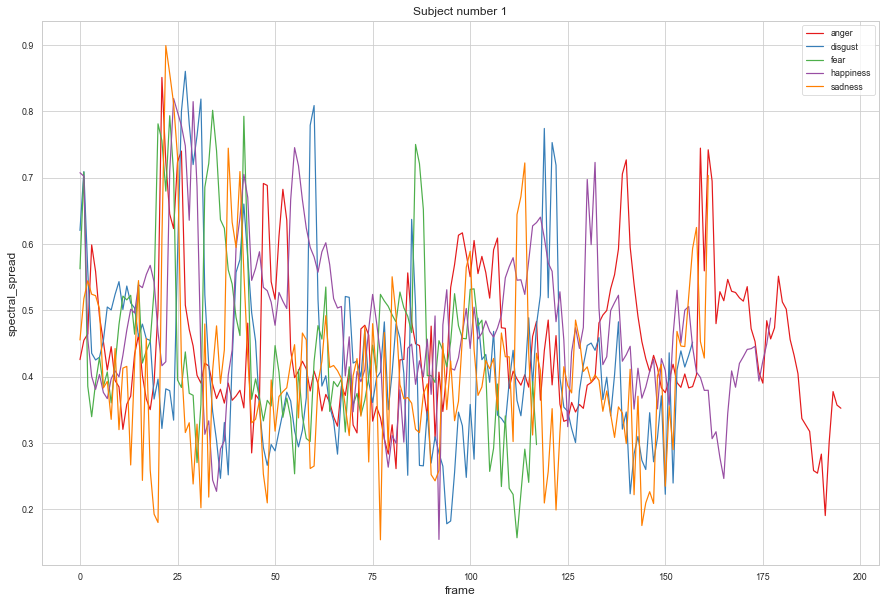

In [27]:
one_subject_one_feature(1, "spectral_spread", df_features, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

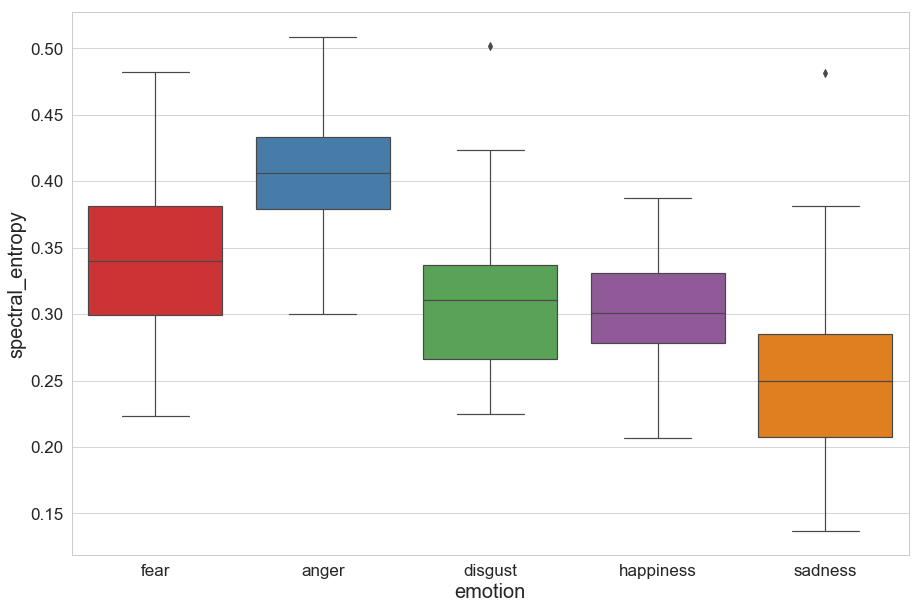

In [28]:
display_boxplot("spectral_entropy", df_features, df_emotions)

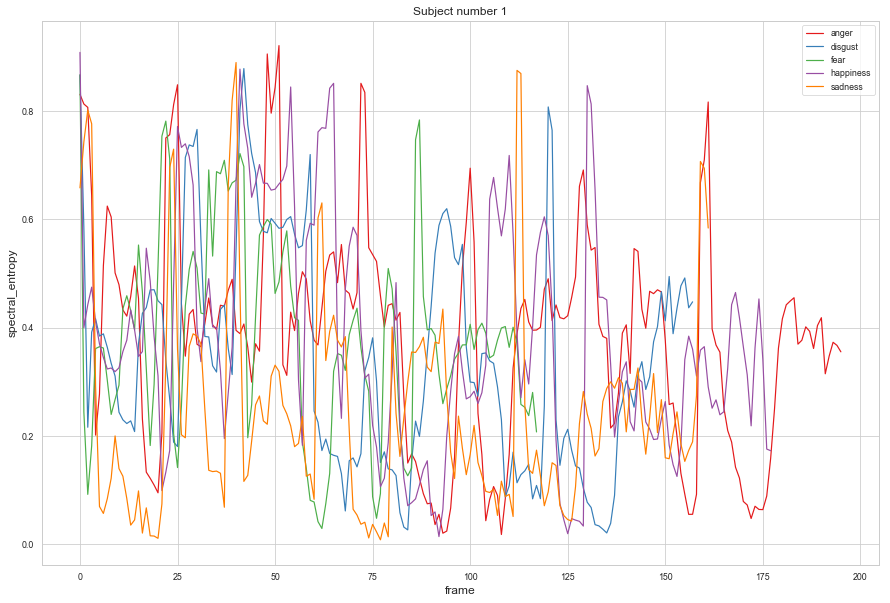

In [29]:
one_subject_one_feature(1, "spectral_entropy", df_features, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

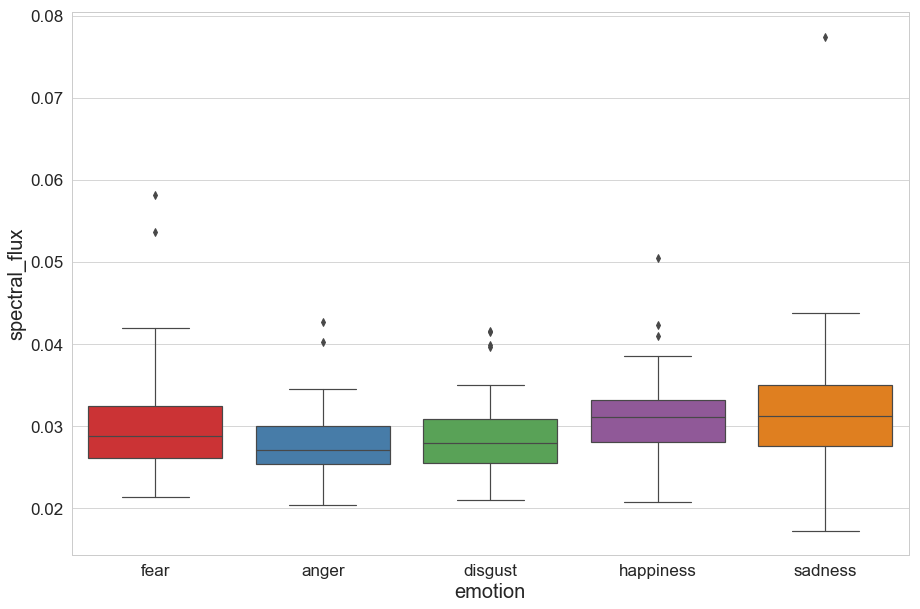

In [30]:
display_boxplot("spectral_flux", df_features, df_emotions)

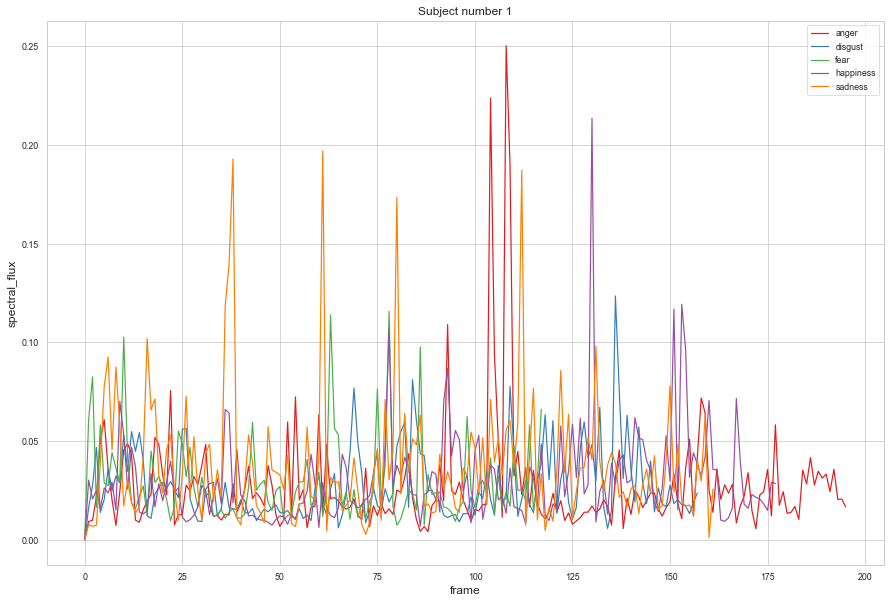

In [31]:
one_subject_one_feature(1, "spectral_flux", df_features, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

In [33]:
display_boxplot("spectral_rolloff", df_features, df_emotions)

In [34]:
one_subject_one_feature(1, "spectral_rolloff", df_features, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

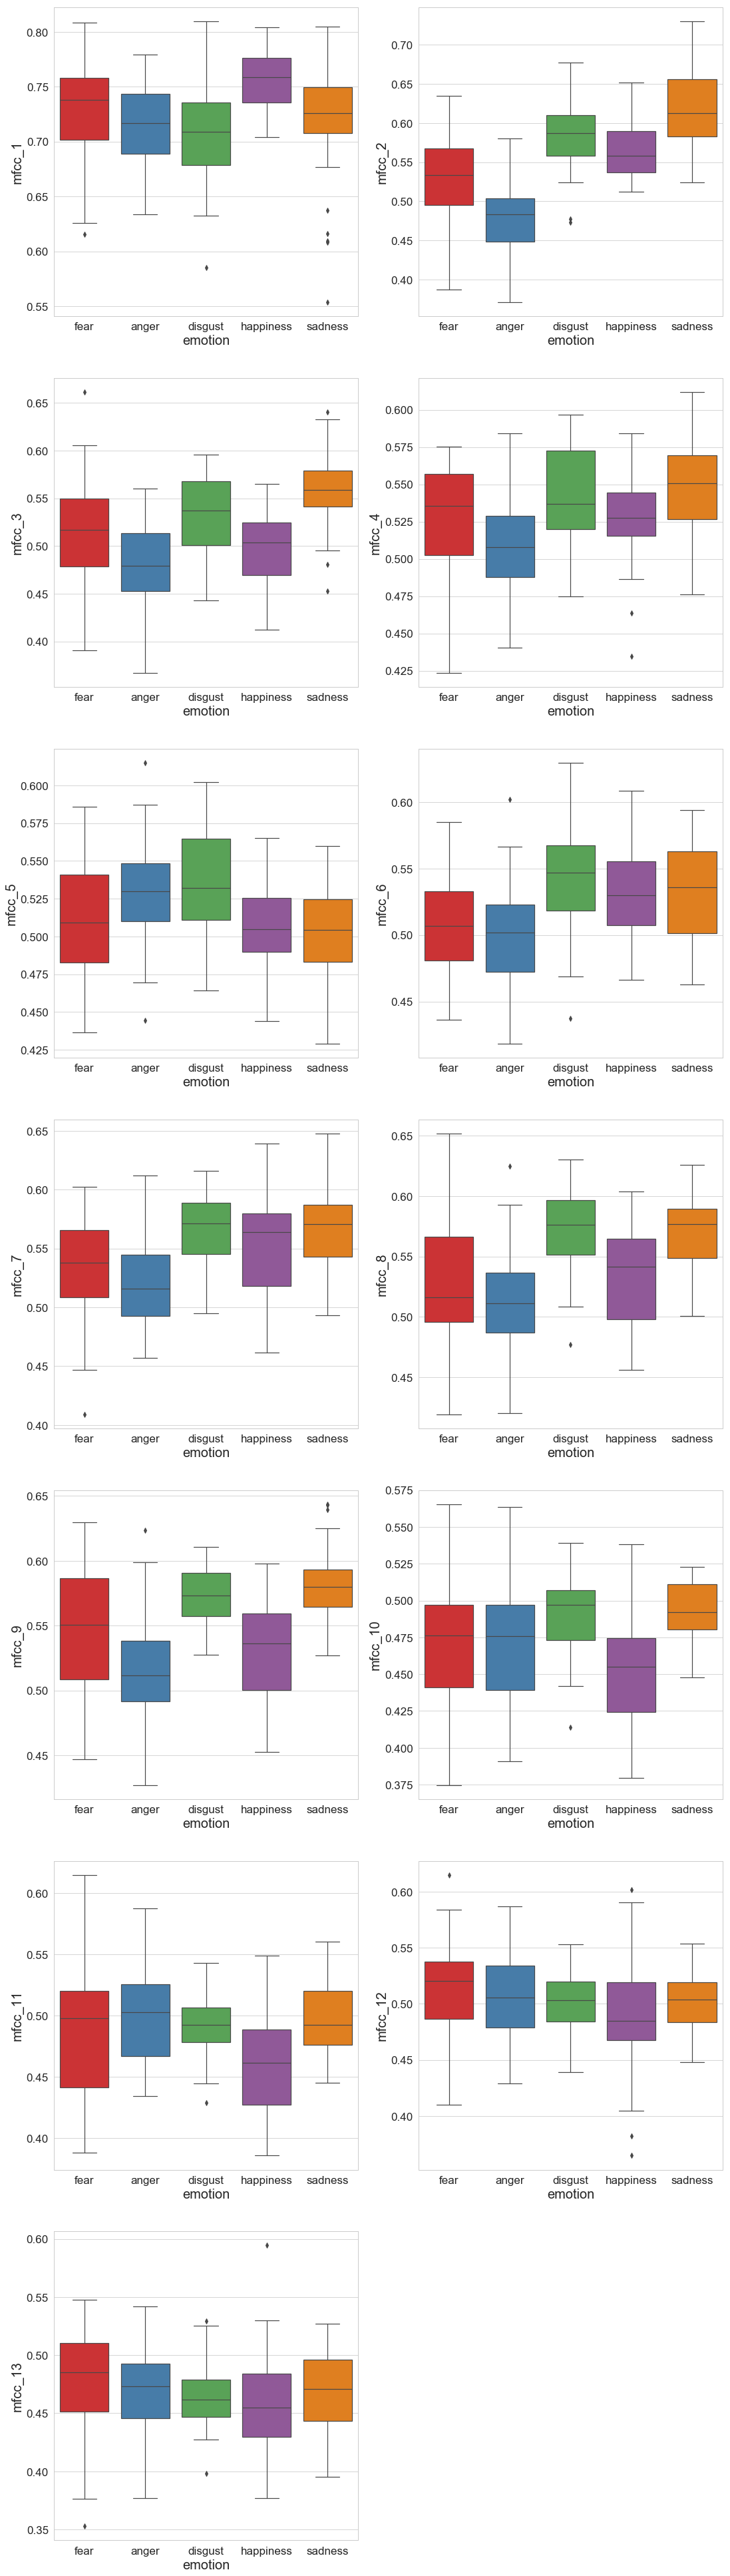

In [37]:
plt.rcParams['figure.figsize'] = (18.0, 70.0)
i=1
for mfcc in df_features.columns[8:21]:
    plt.subplot(7,2,i)
    display_boxplot(mfcc, df_features, df_emotions)

    i+=1
plt.show()

plt.rcParams['figure.figsize'] = (15.0, 10.0)

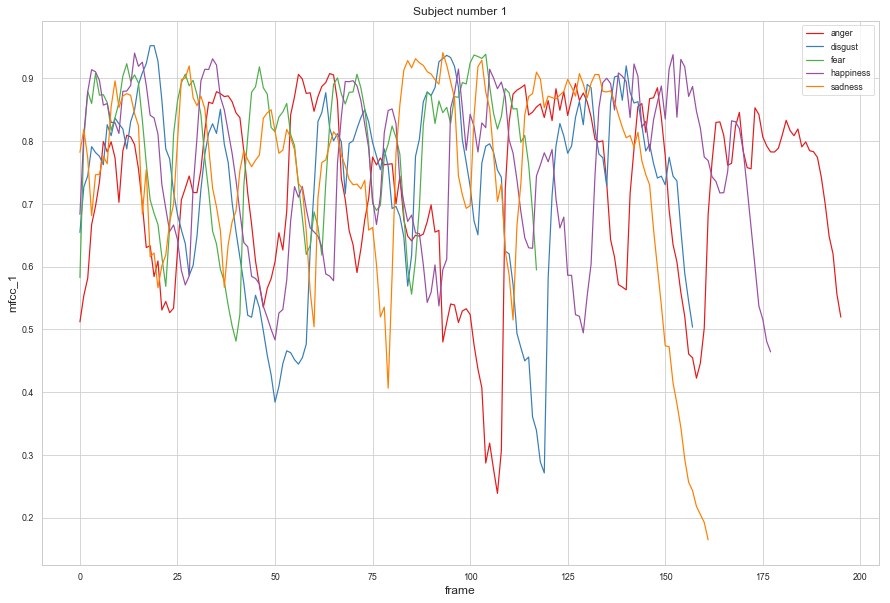

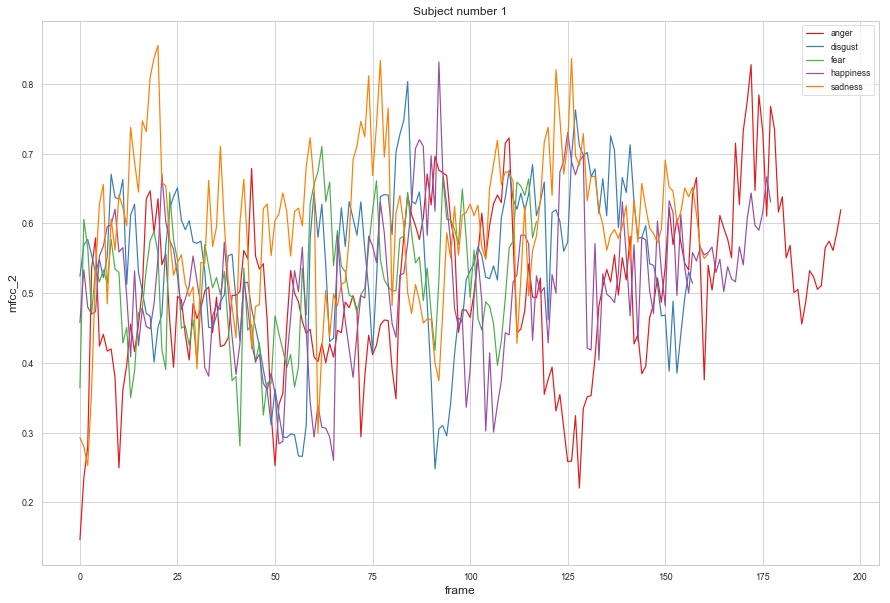

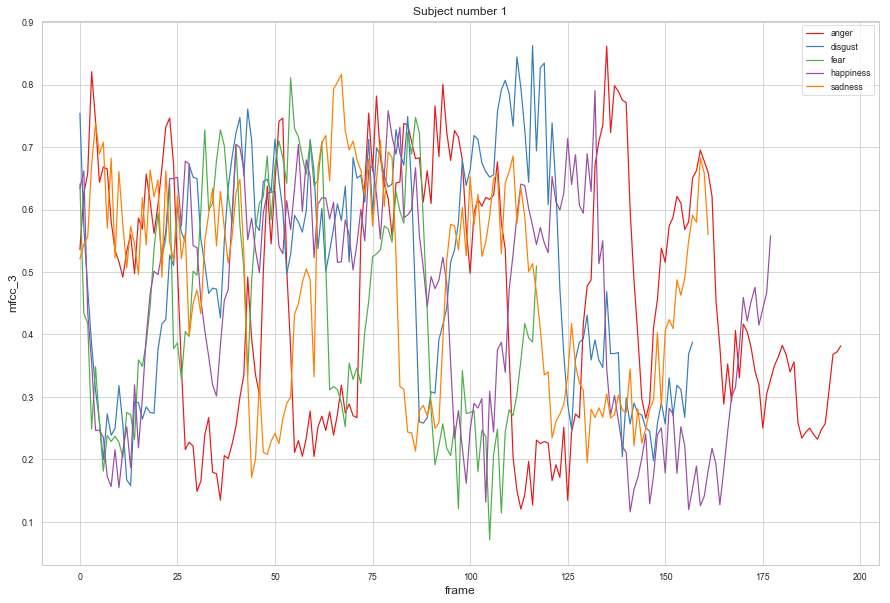

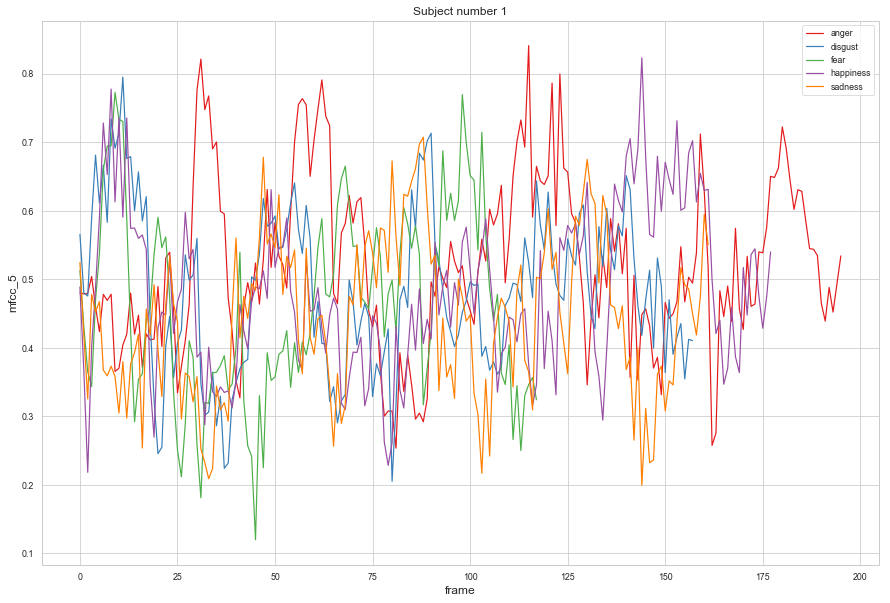

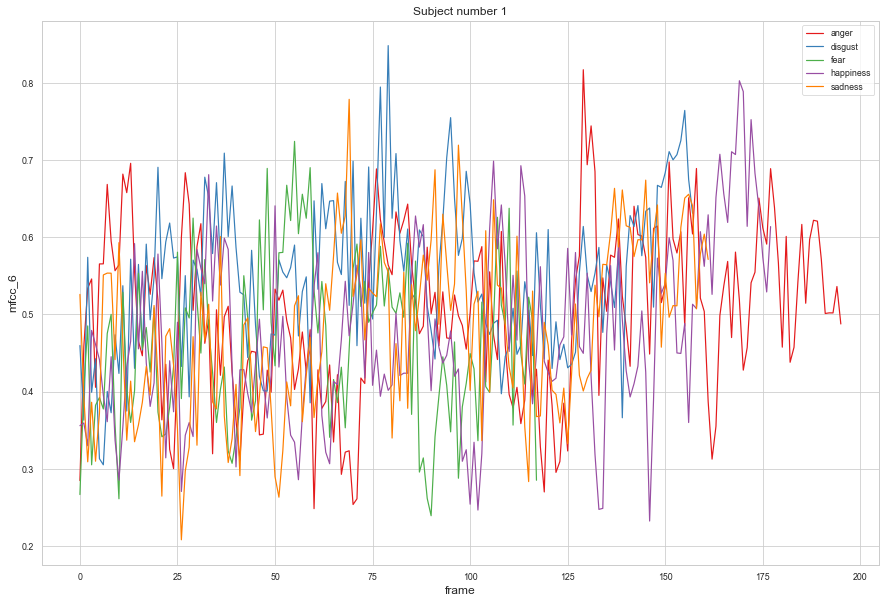

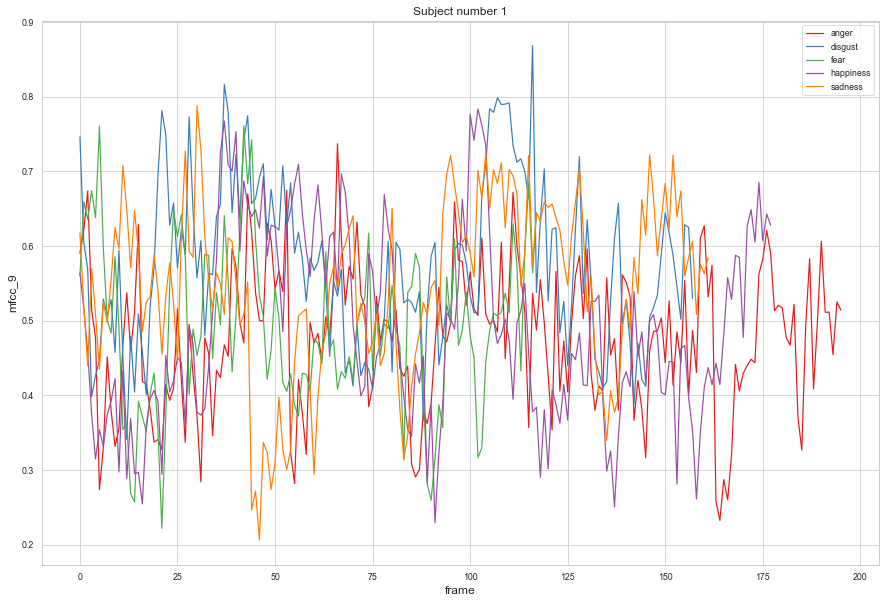

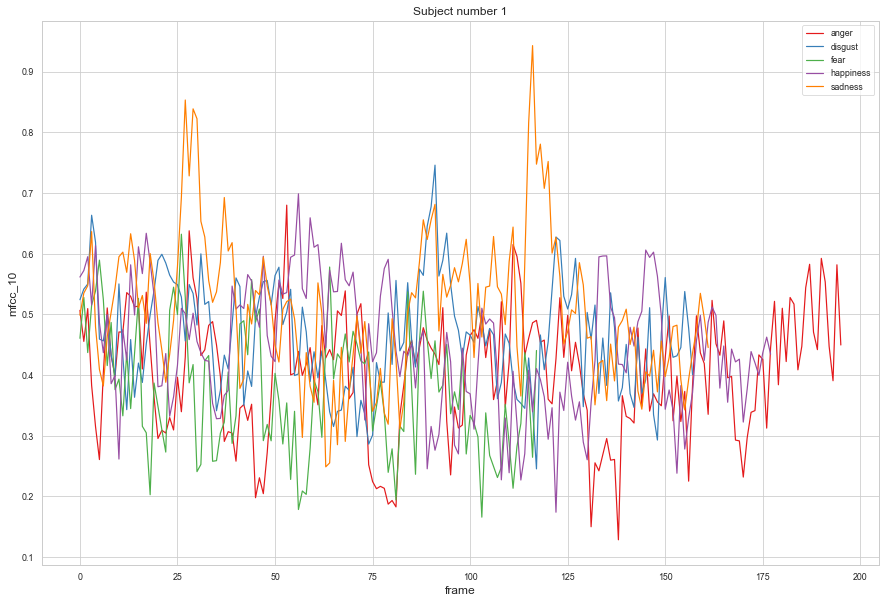

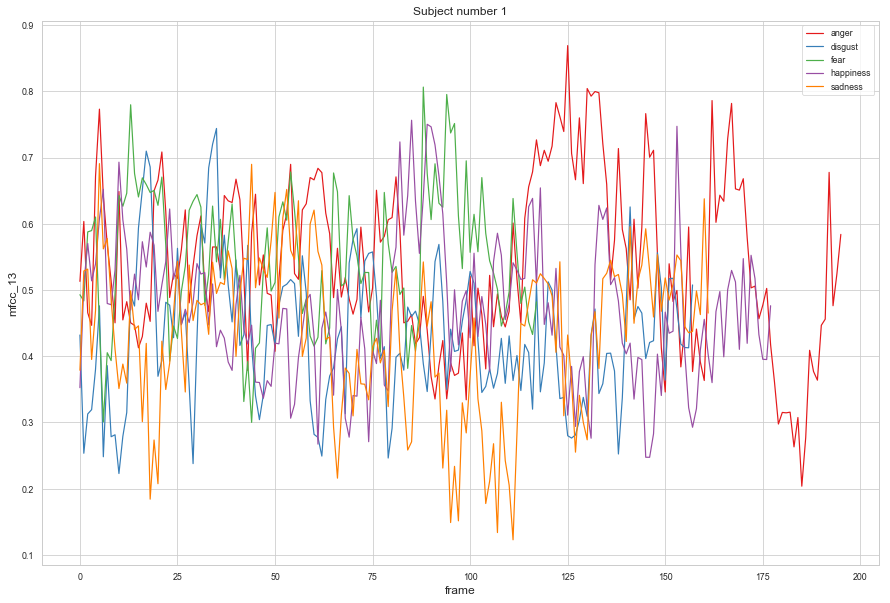

In [40]:
for mfcc in df_features.columns[8:21]:
    one_subject_one_feature(1, mfcc, df_features, df_emotions)
    plt.show()